In [1]:
import pandas as pd

C:\Users\wuchu\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data=pd.read_csv("dataset/Text.csv",index_col=0)

In [3]:
data

,post_text,followers,friends,favourites,statuses,label
0,It's just over 2 years since I was diagnosed w...,84,211,251,837,1
1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1
2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,1
4,It’s hard to say whether packing lists are mak...,84,211,251,837,1
...,...,...,...,...,...,...
19995,A day without sunshine is like night.,442,230,7,1063601,0
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",442,230,7,1063601,0
19997,The flow chart is a most thoroughly oversold p...,442,230,7,1063601,0
19998,"Ships are safe in harbor, but they were never ...",442,230,7,1063601,0


In [4]:
data['text_length'] = data['post_text'].apply(len)
data

,post_text,followers,friends,favourites,statuses,label,text_length
0,It's just over 2 years since I was diagnosed w...,84,211,251,837,1,140
1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,95
2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,1,64
3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,1,140
4,It’s hard to say whether packing lists are mak...,84,211,251,837,1,133
...,...,...,...,...,...,...,...
19995,A day without sunshine is like night.,442,230,7,1063601,0,37
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",442,230,7,1063601,0,99
19997,The flow chart is a most thoroughly oversold p...,442,230,7,1063601,0,124
19998,"Ships are safe in harbor, but they were never ...",442,230,7,1063601,0,66


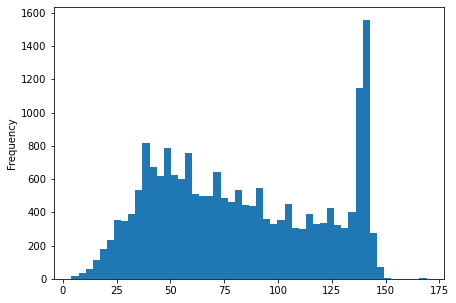

In [5]:
data['text_length'].plot(kind='hist', bins=50, figsize=(7, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DCA9EB9AC0>,
      dtype=object)

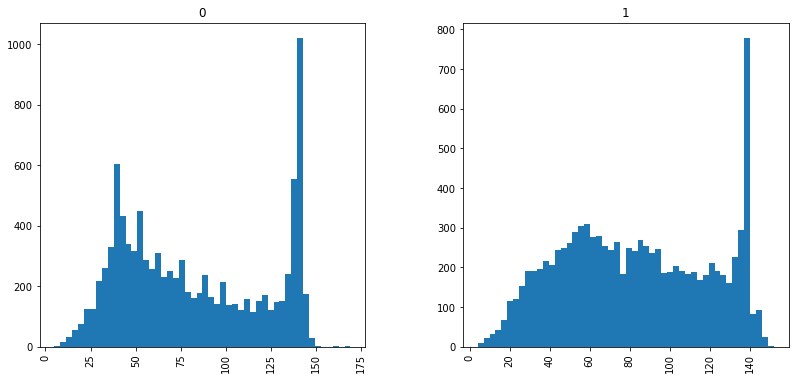

In [6]:
data.hist(column='text_length', bins=50, by='label', figsize=(13, 6))

In [7]:
data['text_length'].describe()

count    19883.000000
mean        82.511291
std         38.280046
min          4.000000
25%         50.000000
50%         78.000000
75%        118.000000
max        169.000000
Name: text_length, dtype: float64

## Text Pre-processing

In [8]:
import string
from nltk.corpus import stopwords 

In [9]:
def text_process(text):
    nonpunctuation = [char for char in text if char not in string.punctuation]
    nonpunctuation = ''.join(nonpunctuation)
    return [word for word in nonpunctuation.split() if word.lower() not in stopwords.words('english')]

In [10]:
data['post_text'].head(5).apply(text_process)

0    [2, years, since, diagnosed, anxiety, depressi...
1    [Sunday, need, break, Im, planning, spend, lit...
2            [Awake, tired, need, sleep, brain, ideas]
3    [RT, SewHQ, Retro, bears, make, perfect, gifts...
4    [It’s, hard, say, whether, packing, lists, mak...
Name: post_text, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Vectorization

In [12]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(data['post_text'])
print(len(bow_transformer.vocabulary_))

41869


In [13]:
text_bow = bow_transformer.transform(data['post_text'])

In [14]:
print('Shape of Sparse Matrix: ', text_bow.shape)
print('Amount of Non-Zero occurences: ', text_bow.nnz)
sparsity = (100.0 * text_bow.nnz / (text_bow.shape[0] * text_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

Shape of Sparse Matrix:  (19883, 41869)
Amount of Non-Zero occurences:  155653
sparsity: 0


## Term Frequency and Inverse document Frequency

In [15]:
tfidf_transformer = TfidfTransformer().fit(text_bow)
text_tfidf = tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(19883, 41869)


## Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data['post_text'], data['label'], test_size=0.2, random_state=123)

## Creating Data Pipeline

In [17]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [18]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001DCBF79CA60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

## Predictions

In [19]:
y_hat = pipeline.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1767
           1       0.91      0.81      0.86      2210

    accuracy                           0.85      3977
   macro avg       0.85      0.86      0.85      3977
weighted avg       0.86      0.85      0.85      3977



Text(51.0, 0.5, 'Real Labels')

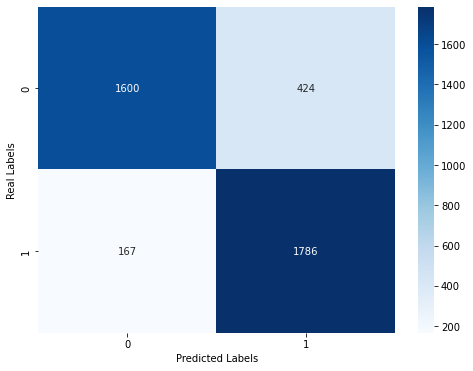

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
#plot the confusion matrix
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, np.where(y_hat >= 0.5, 1, 0)), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')